In [43]:
import random
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
def init_testbench():
    l_avgr= []
    k=10
    for i in range(0,k):
        sum =0
        for j in range(0,20):
            mu,sigma = 1,1
            s = np.random.normal(mu, sigma)
            sum +=s
        l_avgr.append(sum/20)
    #print(l_avgr)
    return l_avgr


In [21]:

def bandit(k,l_avgr): 
    mu,sigma = 0,1
    #noise = np.random.normal(l_avgr[k], sigma)
    noise = np.random.normal(mu, sigma)
    return   l_avgr[k] + noise
    
    

In [62]:
def eps_greedy(eps, init): 
    expected_reward=[0 for j in range(1000)]
    print(len(expected_reward))
    for exp in range(num_exps):
        Q=[]
        N=[]       
        for i in range(0,k):
            Q.append(init)
            N.append(0)
        l_avgr = init_testbench()
        
        arm = random.randint(0,k-1)
        max_arm = arm
        max_reward = Q[arm]
            
        for i in range(1000):               
            r = random.uniform(0, 1)
            #print(r)
            arm = max_arm
            #print(max_arm, l_avgr[max_arm])
            if(r<eps): 
                arm = random.randint(0,k-1) 
                #print("exploring", arm)

            reward= bandit(arm,l_avgr)
            N[arm] +=1
            Q[arm] = Q[arm] + (float(reward- Q[arm]))/N[arm]
            
            #update the arm with maximum reward experience
            max_reward = -1000
            for a in range(k): 
                if(Q[a]> max_reward): 
                    max_arm = a
                    max_reward = Q[a]
            expectation =0

            for arm in range(0,k): 
                #expectation += Q[arm]
                expected_reward[i] +=(eps*(l_avgr[arm])/k)               
            expected_reward[i] += (1-eps)*l_avgr[max_arm]
            
    expected_reward = [x/num_exps for x in expected_reward]
    return expected_reward  






# Q- 2.1

1000
1000
1000


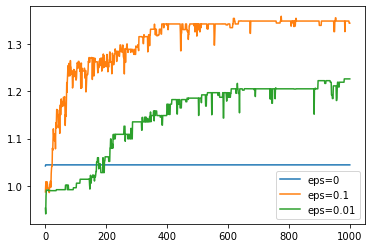

<Figure size 432x288 with 0 Axes>

In [98]:
k=10
num_exps= 20    
er_1= eps_greedy(0,0)
er_2= eps_greedy(0.1,0)
er_3= eps_greedy(0.01,0)
#print(er_1)
plt.plot(er_1, label = "eps=0")
plt.plot(er_2, label = "eps=0.1")
plt.plot(er_3, label = "eps=0.01")
plt.legend()
plt.show()
plt.savefig('q2.1.png')

# Q-2.2 

1000
1000
1000
1000


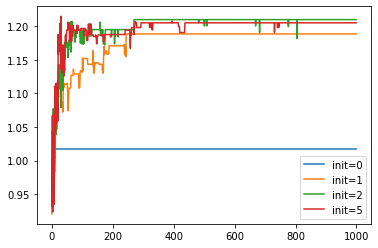

<Figure size 432x288 with 0 Axes>

In [66]:
k=10
num_exps= 20    
er_1= eps_greedy(0, 0)
er_2= eps_greedy(0, 1)
er_3= eps_greedy(0,2)
er_4= eps_greedy(0,5)
#print(er_1)
plt.plot(er_1, label = "init=0")
plt.plot(er_2, label = "init=1")
plt.plot(er_3, label = "init=2")
plt.plot(er_4, label = "init=5")
plt.legend()
plt.show()
plt.savefig('q2.2.png')

# Q-2.3

In [76]:
import math
def ucb_explore(eps, init, c): 
    expected_reward=[0 for j in range(1000)]
    print(len(expected_reward))
    for exp in range(num_exps):
        Q=[]
        N=[]       
        for i in range(0,k):
            Q.append(init)
            N.append(0)
        l_avgr = init_testbench()
        
        arm = random.randint(0,k-1)
        max_arm = arm
        max_reward = -100000
            
        for i in range(1000): 
            for a in range(k):
                if(N[a]!=0):
                    val = Q[a]  + c* math.sqrt(math.log(i)/N[a])
                else: 
                    val= 100000
                if(val > max_reward): 
                    max_reward = val 
                    max_arm = a
                    
            reward= bandit(max_arm,l_avgr)
            N[max_arm] +=1
            Q[max_arm] = Q[max_arm] + (float(reward- Q[max_arm]))/N[max_arm]
            
            #update the arm with maximum reward experience
            max_reward = -1000
            for a in range(k): 
                if(Q[a]> max_reward): 
                    max_arm = a
                    max_reward = Q[a]
            expectation =0

            for arm in range(0,k): 
                #expectation += Q[arm]
                expected_reward[i] +=(eps*(l_avgr[arm])/k)               
            expected_reward[i] += (1-eps)*l_avgr[max_arm]
            
    expected_reward = [x/num_exps for x in expected_reward]
    return expected_reward

1000
1000
1000
1000


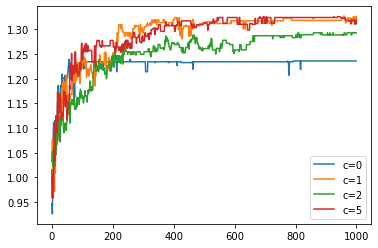

<Figure size 432x288 with 0 Axes>

In [97]:
k=10
num_exps= 20    
er_1= ucb_explore(0, 0,0)
er_2= ucb_explore(0,0, 1)
er_3= ucb_explore(0,0,2)
er_4= ucb_explore(0,0,5)
#print(er_1)
plt.plot(er_1, label = "c=0")
plt.plot(er_2, label = "c=1")
plt.plot(er_3, label = "c=2")
plt.plot(er_4, label = "c=5")
plt.legend()
plt.show()
plt.savefig('q2.3.png')

# Q- 2.4

In [101]:
def boltzman_exploration(eps, init, temp): 
    alpha =0.1
    expected_reward=[0 for j in range(1000)]
    print(len(expected_reward))
    for exp in range(num_exps):
        H=[]
        Q=[]
        N=[] 
        pi=[]
        for i in range(0,k):
            H.append(init)
            Q.append(init)
            N.append(0)
            pi.append(0)
        l_avgr = init_testbench()
        
        arm = random.randint(0,k-1)
        max_arm = arm
        max_reward = Q[arm]
            
        for i in range(1000):
            reward= bandit(max_arm,l_avgr)
            H[max_arm]= H[max_arm] + alpha*(reward - Q[max_arm])*(1-pi[max_arm])
            for arm in range(k): 
                if(arm != max_arm): 
                    H[arm]= H[arm] - alpha*(reward - Q[arm])*(pi[arm])
            den =0      
            for arm in range(k):
                den  += (math.exp(H[arm]/temp))
            for arm in range(k):
                pi[arm] = (math.exp(H[arm]/temp))/den  
                
            
            N[max_arm] +=1
            Q[max_arm] = Q[max_arm] + (float(reward- Q[max_arm]))/N[max_arm]
            
            #update the arm with maximum reward experience
            max_reward = -1000000
            for a in range(k): 
                if(H[a]> max_reward): 
                    max_arm = a
                    max_reward = H[a]
            expectation =0

            for arm in range(0,k): 
                #expectation += Q[arm]
                expected_reward[i] +=(pi[arm]*(l_avgr[arm]))               
            #expected_reward[i] += (1-eps)*l_avgr[max_arm]
            
    expected_reward = [x/num_exps for x in expected_reward]
    return expected_reward  


1000
1000
1000
1000
1000


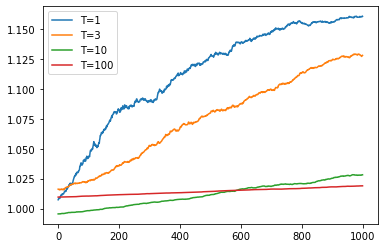

<Figure size 432x288 with 0 Axes>

In [103]:
er_1=  boltzman_exploration(0, 0, 1)
er_2=  boltzman_exploration(0, 0, 3)
er_3=  boltzman_exploration(0, 0, 10)
er_4=  boltzman_exploration(0, 0, 30)
er_5=  boltzman_exploration(0, 0, 100)
plt.plot(er_1, label = "T=1")
plt.plot(er_2, label = "T=3")
plt.plot(er_3, label = "T=10")
plt.plot(er_4, label = "T=100")
plt.legend()
plt.show()
plt.savefig('q2.4.png')